In [51]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from utils import get_eval_stats, analyze_protein_gen_helper, analyze_protein_gen_helper_violin, plot_line_prot_comp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
color_bank = ['#6CA783', '#0C8CE1', '#8C33EB', "#DE9D12", "#C500C5", "#3C99A8"]
protein = '7JJK'

In [53]:
pretrained_file = 'data_full/baseline/pretrained/distribution/original_old_10_0.5_0_results_merge_old_baseline.csv'
drakes_file = 'data_full/baseline/drakes/distribution/original_new_10_0.5_0_results_merge_new_baseline.csv'
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)
pre_stats = get_eval_stats(df_pre, target_protein=protein)
drakes_stats = get_eval_stats(df_drakes, target_protein=protein)

In [54]:
def evaluate_ddg_ll_corr(df, protein, title=''):
    df = df[df['protein_name'] == protein + ".pdb"]
    pre_ddg = df['ddg_eval']
    pre_protgpt = df['loglikelihood']
    corr = pearsonr(pre_ddg, pre_protgpt).statistic#np.corrcoef(pre_ddg, pre_protgpt)
    print(corr)

    plt.scatter(pre_ddg, pre_protgpt)
    slope, intercept = np.polyfit(pre_ddg, pre_protgpt, 1)
    x_vals = np.array(plt.xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color='red', linestyle='--')
    plt.xlabel('ΔΔG')
    plt.ylabel('Log Likelihood')
    plt.title(f"{title} (r = {round(corr, 3)})")
    plt.show()

In [55]:
def evaluate_ddg_ll_corr_mult(df_list, labels, protein, title=''):
    for i, df in enumerate(df_list):
        df = df[df['protein_name'] == protein + ".pdb"]
        pre_ddg = df['ddg_eval']
        pre_protgpt = df['loglikelihood']
        plt.scatter(pre_ddg, pre_protgpt, label=labels[i])
    plt.xlabel('ΔΔG')
    plt.ylabel('Log Likelihood')
    plt.title(title)
    plt.legend()
    plt.show()

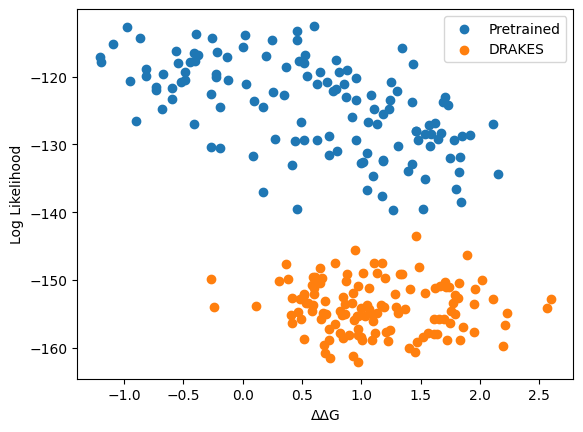

In [56]:
evaluate_ddg_ll_corr_mult([df_pre, df_drakes], ['Pretrained', 'DRAKES'], protein)

-0.5591944869943313


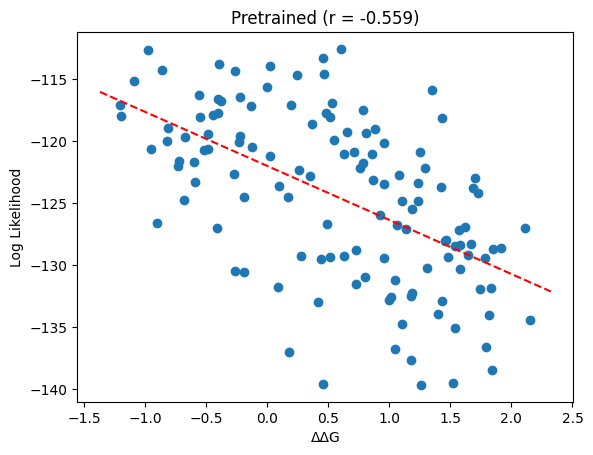

In [57]:
evaluate_ddg_ll_corr(df_pre, protein, title='Pretrained')

-0.06278985685032008


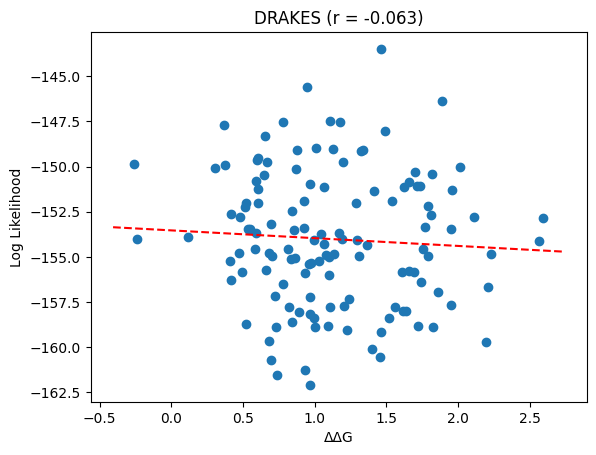

In [58]:
evaluate_ddg_ll_corr(df_drakes, protein, title='DRAKES')

In [59]:
base_path = 'data_full/comp_250/'
bon_ddg_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_bon_ddg_250_1.csv'
bon_protgpt_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_bon_protgpt_250_1.csv'
beam_ddg_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_beam_ddg_250_1.csv'
beam_protgpt_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_beam_protgpt_250_1.csv'
spectral_ddg_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_spectral_ddg_250_1.csv'
spectral_protgpt_250_new_fn = base_path + 'original_new_10_0.5_0_results_merge_new_7JJK_spectral_protgpt_250_1.csv'
bon_ddg_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_bon_ddg_250_1.csv'
bon_protgpt_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_bon_protgpt_250_1.csv'
beam_ddg_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_beam_ddg_250_1.csv'
beam_protgpt_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_beam_protgpt_250_1.csv'
spectral_ddg_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_spectral_ddg_250_1.csv'
spectral_protgpt_250_old_fn = base_path + 'original_old_10_0.5_0_results_merge_old_7JJK_spectral_protgpt_250_1.csv'

In [60]:
bon_ddg_250_new = pd.read_csv(bon_ddg_250_new_fn)
bon_protgpt_250_new = pd.read_csv(bon_protgpt_250_new_fn)
beam_ddg_250_new = pd.read_csv(beam_ddg_250_new_fn)
beam_protgpt_250_new = pd.read_csv(beam_protgpt_250_new_fn)
spectral_ddg_250_new = pd.read_csv(spectral_ddg_250_new_fn)
spectral_protgpt_250_new = pd.read_csv(spectral_protgpt_250_new_fn)

bon_ddg_250_old = pd.read_csv(bon_ddg_250_old_fn)
bon_protgpt_250_old = pd.read_csv(bon_protgpt_250_old_fn)
beam_ddg_250_old = pd.read_csv(beam_ddg_250_old_fn)
beam_protgpt_250_old = pd.read_csv(beam_protgpt_250_old_fn)
spectral_ddg_250_old = pd.read_csv(spectral_ddg_250_old_fn)
spectral_protgpt_250_old = pd.read_csv(spectral_protgpt_250_old_fn)

In [61]:
bon_ddg_250_new_stats = get_eval_stats(bon_ddg_250_new, target_protein=protein)
beam_ddg_250_new_stats = get_eval_stats(beam_ddg_250_new, target_protein=protein)
spectral_ddg_250_new_stats = get_eval_stats(spectral_ddg_250_new, target_protein=protein)

bon_ddg_250_old_stats = get_eval_stats(bon_ddg_250_old, target_protein=protein)
beam_ddg_250_old_stats = get_eval_stats(beam_ddg_250_old, target_protein=protein)
spectral_ddg_250_old_stats = get_eval_stats(spectral_ddg_250_old, target_protein=protein)

bon_protgpt_250_new_stats = get_eval_stats(bon_protgpt_250_new, target_protein=protein)
beam_protgpt_250_new_stats = get_eval_stats(beam_protgpt_250_new, target_protein=protein)
spectral_protgpt_250_new_stats = get_eval_stats(spectral_protgpt_250_new, target_protein=protein)

bon_protgpt_250_old_stats = get_eval_stats(bon_protgpt_250_old, target_protein=protein)
beam_protgpt_250_old_stats = get_eval_stats(beam_protgpt_250_old, target_protein=protein)
spectral_protgpt_250_old_stats = get_eval_stats(spectral_protgpt_250_old, target_protein=protein)

In [62]:
import pandas as pd

def create_table_from_dicts(dict_list, labels, filename):
    df = pd.DataFrame(dict_list, index=labels)
    df.to_excel(filename)
    print(f"Table saved to '{filename}'")

In [63]:
stats = [pre_stats, drakes_stats,
        bon_ddg_250_old_stats, bon_ddg_250_new_stats,
        bon_protgpt_250_old_stats, bon_protgpt_250_new_stats,
        beam_ddg_250_old_stats, beam_ddg_250_new_stats,
        beam_protgpt_250_old_stats, beam_protgpt_250_new_stats,
        spectral_ddg_250_old_stats, spectral_ddg_250_new_stats,
        spectral_protgpt_250_old_stats, spectral_protgpt_250_new_stats]
stat_labels = ["Pretrained", "DRAKES",
               "BON-DDG-Pretrained", "BON-DDG-DRAKES",
               "BON-ProtGPT-Pretrained", "BON-ProtGPT-DRAKES",
               "BEAM-DDG-Pretrained", "BEAM-DDG-DRAKES",
               "BEAM-ProtGPT-Pretrained", "BEAM-ProtGPT-DRAKES",
               "Spectral-DDG-Pretrained", "Spectral-DDG-DRAKES",
               "Spectral-ProtGPT-Pretrained", "Spectral-ProtGPT-DRAKES"]
assert len(stats) == len(stat_labels), print(f"{len(stats)} != {len(stat_labels)}")
create_table_from_dicts(stats, stat_labels, 'comp250_summary.xlsx')

Table saved to 'comp250_summary.xlsx'


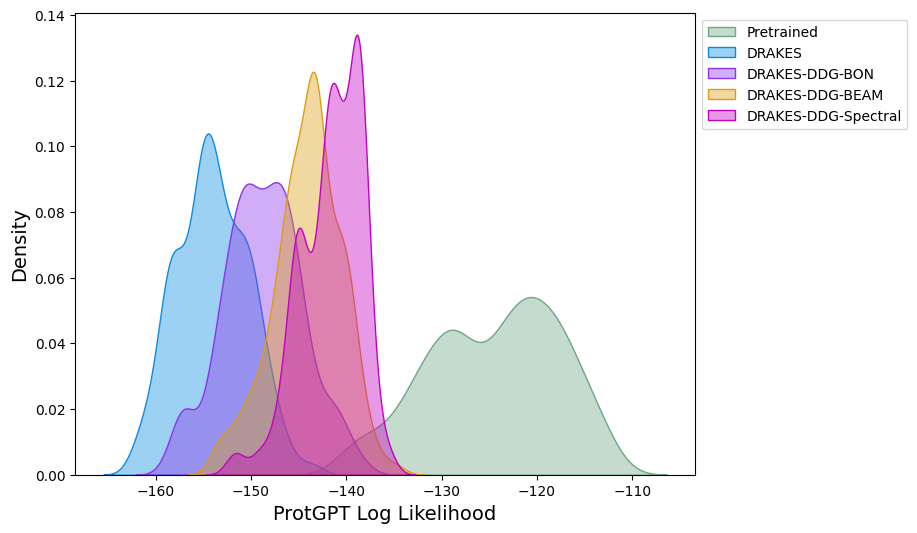

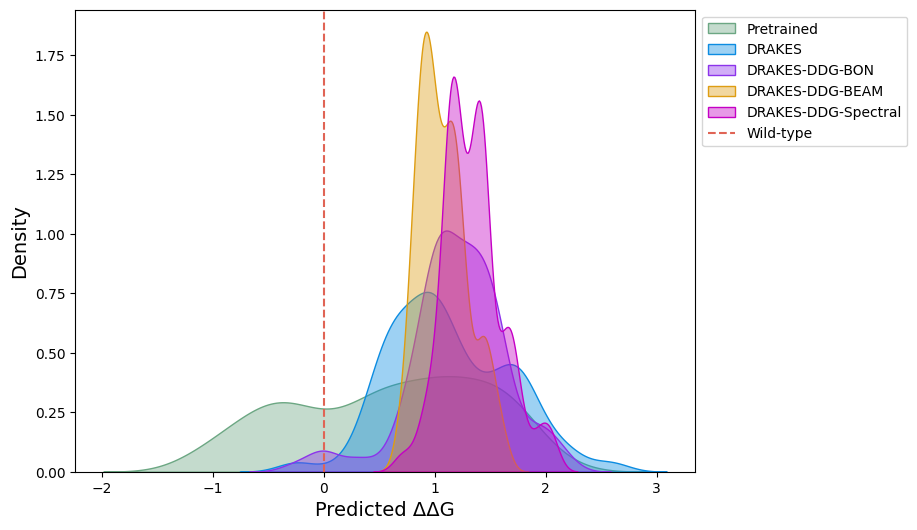

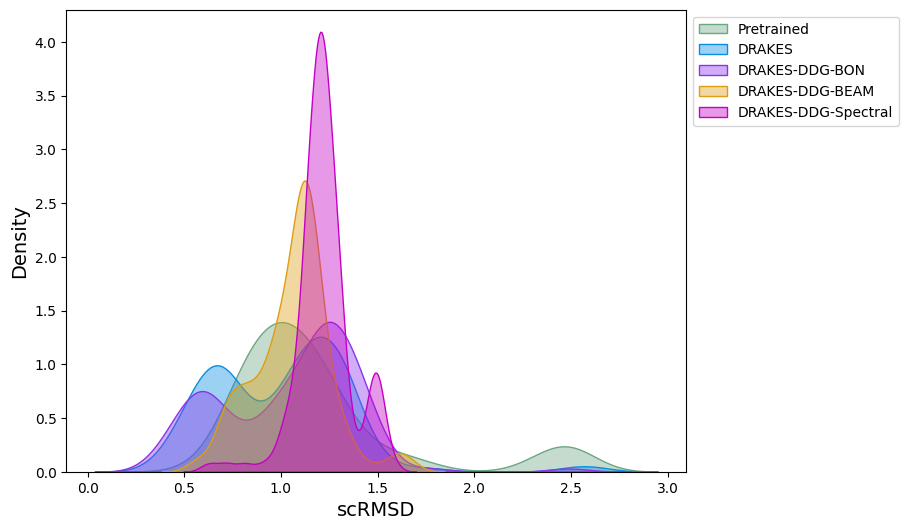

In [64]:
data = [df_pre, df_drakes, bon_ddg_250_new, beam_ddg_250_new, spectral_ddg_250_new]
labels = ['Pretrained', 'DRAKES', 'DRAKES-DDG-BON', 'DRAKES-DDG-BEAM', 'DRAKES-DDG-Spectral']
colors = color_bank[:len(data)]
analyze_protein_gen_helper('7JJK', data, labels, colors, 'loglikelihood', y_label='ProtGPT Log Likelihood')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'ddg_eval', y_label='Predicted ΔΔG', v_line_thresh=0, v_line_label='Wild-type')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'scrmsd', y_label='scRMSD')

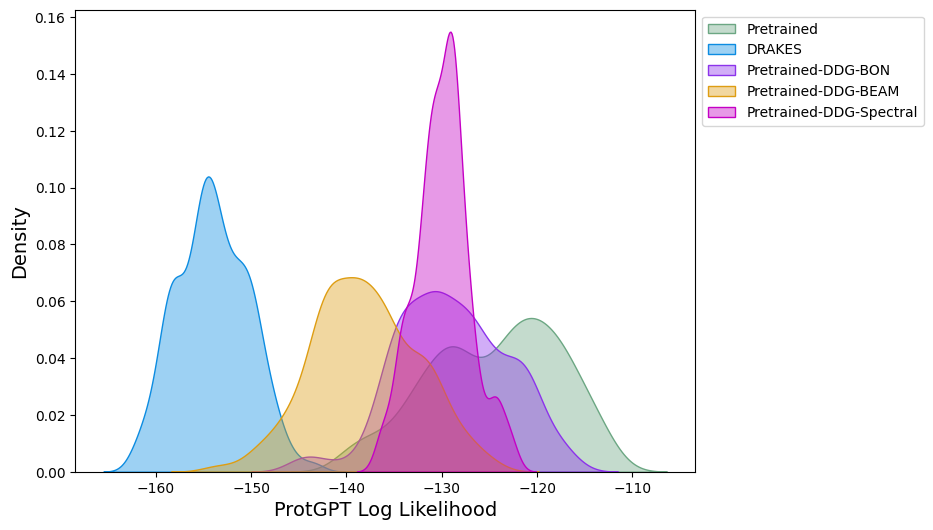

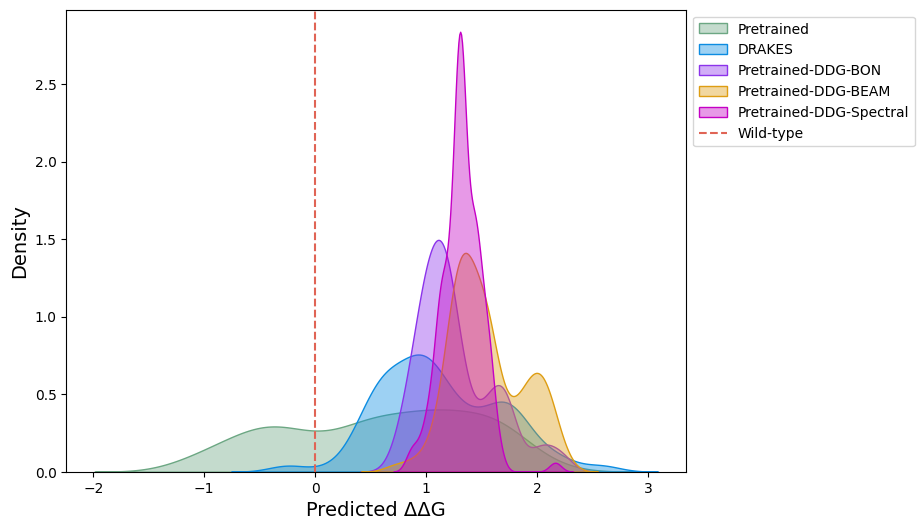

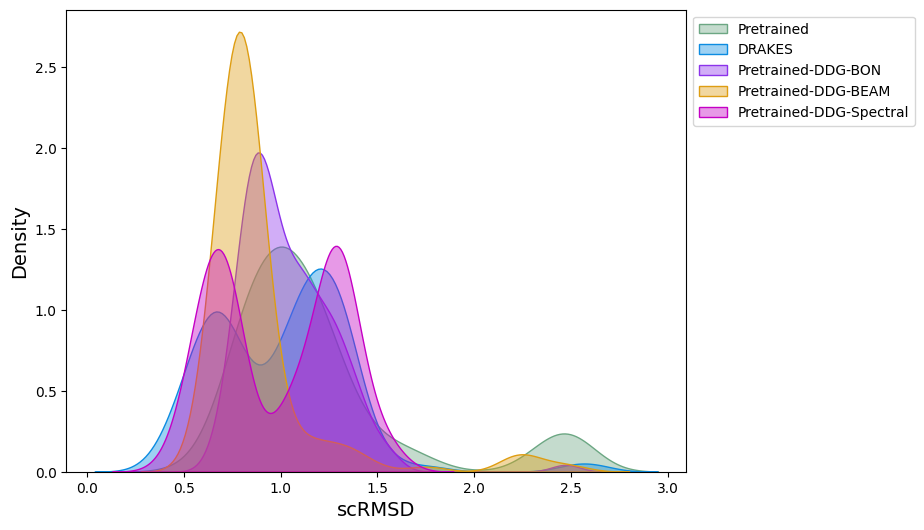

In [65]:
data = [df_pre, df_drakes, bon_ddg_250_old, beam_ddg_250_old, spectral_ddg_250_old]
labels = ['Pretrained', 'DRAKES', 'Pretrained-DDG-BON', 'Pretrained-DDG-BEAM', 'Pretrained-DDG-Spectral']
colors = color_bank[:len(data)]
analyze_protein_gen_helper('7JJK', data, labels, colors, 'loglikelihood', y_label='ProtGPT Log Likelihood')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'ddg_eval', y_label='Predicted ΔΔG', v_line_thresh=0, v_line_label='Wild-type')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'scrmsd', y_label='scRMSD')

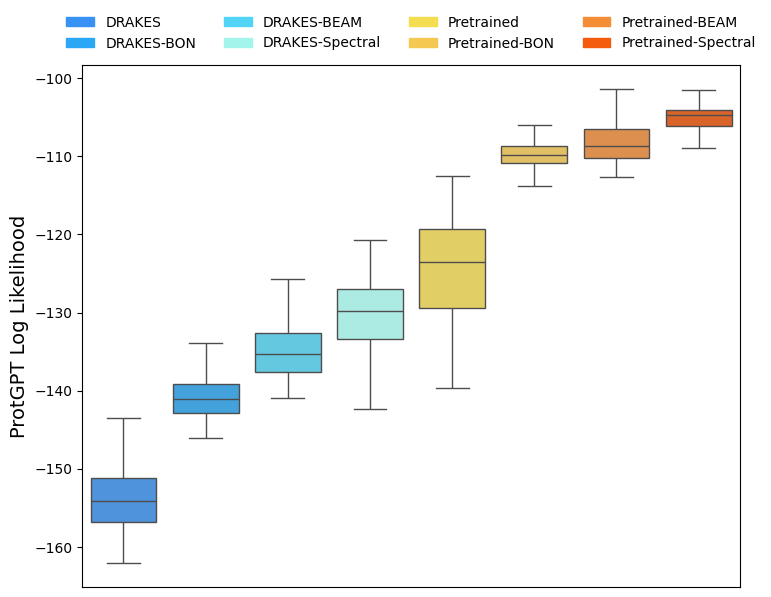

In [66]:
from utils import get_eval_stats, analyze_protein_gen_helper, analyze_protein_gen_helper_violin, plot_line_prot_comp
data = [df_drakes, bon_protgpt_250_new, beam_protgpt_250_new, spectral_protgpt_250_new, df_pre, bon_protgpt_250_old, beam_protgpt_250_old, spectral_protgpt_250_old]
labels = ['DRAKES', 'DRAKES-BON', 'DRAKES-BEAM', 'DRAKES-Spectral', 'Pretrained', 'Pretrained-BON', 'Pretrained-BEAM', 'Pretrained-Spectral']
colors = ['#3792F4', '#2AA8F5', '#51D4F5', '#A2F5EB', "#F5DD51", "#F5C951", "#F58D37", "#F55B0C"]
analyze_protein_gen_helper_violin('7JJK', data, labels, colors, 'loglikelihood', y_label='ProtGPT Log Likelihood')
# analyze_protein_gen_helper('7JJK', data, labels, colors, 'ddg_eval', y_label='Predicted ΔΔG', v_line_thresh=0, v_line_label='Wild-type')
# analyze_protein_gen_helper('7JJK', data, labels, colors, 'scrmsd', y_label='scRMSD')

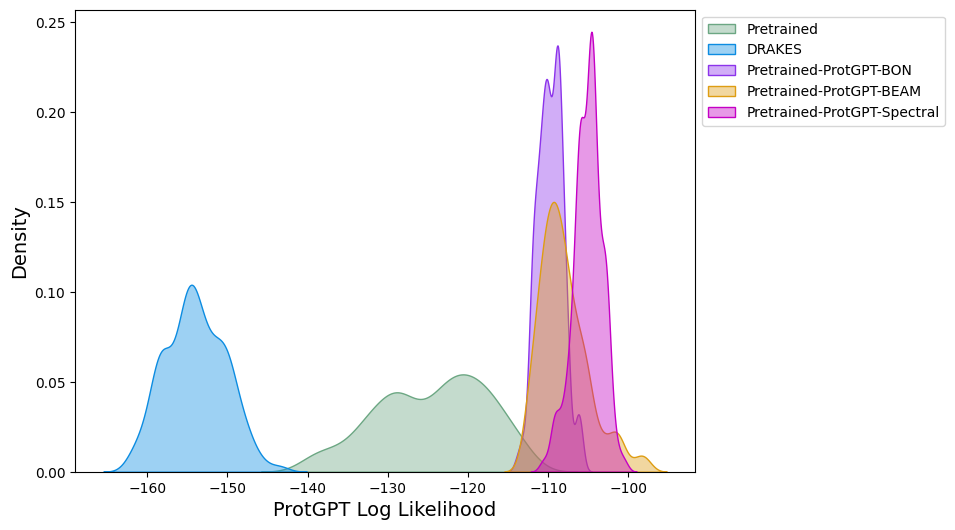

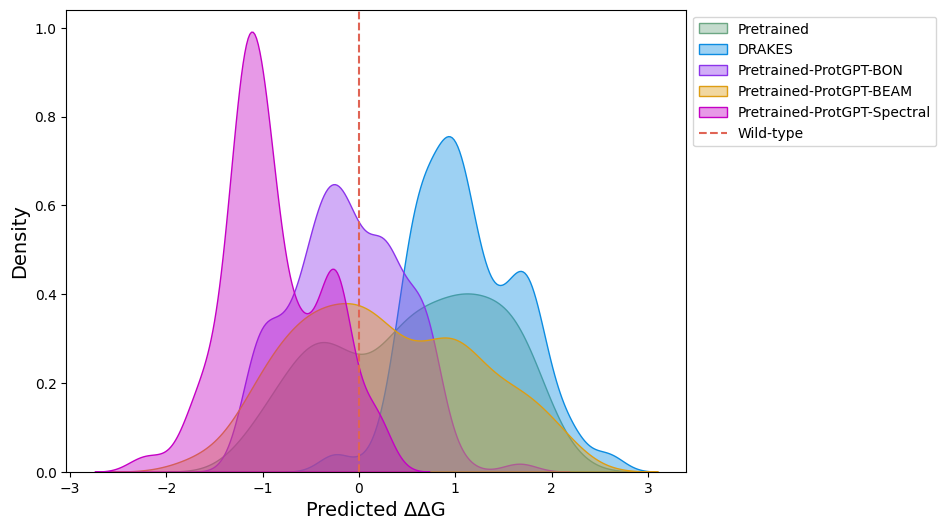

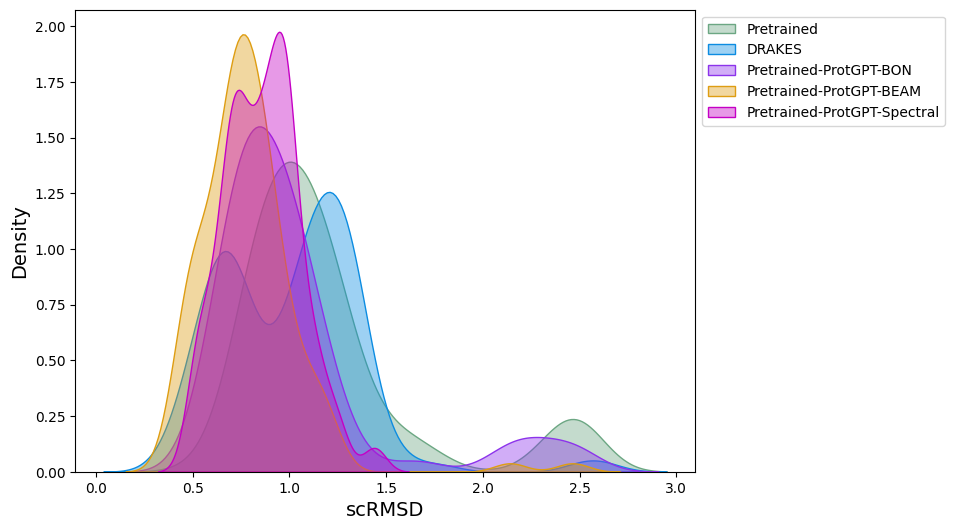

In [67]:
data = [df_pre, df_drakes, bon_protgpt_250_old, beam_protgpt_250_old, spectral_protgpt_250_old]
labels = ['Pretrained', 'DRAKES', 'Pretrained-ProtGPT-BON', 'Pretrained-ProtGPT-BEAM', 'Pretrained-ProtGPT-Spectral']
colors = color_bank[:len(data)]
analyze_protein_gen_helper('7JJK', data, labels, colors, 'loglikelihood', y_label='ProtGPT Log Likelihood')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'ddg_eval', y_label='Predicted ΔΔG', v_line_thresh=0, v_line_label='Wild-type')
analyze_protein_gen_helper('7JJK', data, labels, colors, 'scrmsd', y_label='scRMSD')